## **Data Processing**

LOAD DATA 

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
80074,"51;""technician"";""married"";""tertiary"";""no"";825;..."
80075,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
80076,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
80077,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


pada data Bank Set Marketing memiliki 17 column dengan 45211 baris 

Describe Data 

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Dilihat dari data yang sudah di describe memiliki nilai yang tidak seimbang


MISSING VALUE 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

di data Bank Set tidak memiliki nilai yang hilang

DUPLICATE VALUE

In [ ]:
df.duplicated().sum()

0

dilihat dari sum tidak memiliki data yang terduplicate

In [ ]:
df= df.drop_duplicates(subset=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y'],keep='first')
df.duplicated(subset=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']).sum()

0

di Subset pun juga tidak memiliki data duplikat

In [ ]:
print(df.duplicated().sum())
print(df.duplicated().any())

0
False


OUTLIER

In [ ]:
from scipy import stats

# EDA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
df = pd.read_csv('train.csv', sep = ';')
df

ParserError: ignored

In [ ]:
df[(df['balance'] < 0) && (df['y'] == 'yes')]

SyntaxError: ignored

## Describe Data

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Kita dapat melihat bahwa:
* Dataframe memiliki total 45211 baris dan 17 kolom
* Tidak ada yang memiliki value null (missing value)
* Target klasifikasi sepertinya adalah kolom `y` dengan tipe data `object`
* Berarti sisanya adalah *feature*

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [ ]:
cats = ['job', 'marital','education', 'default','housing', 'loan','contact', 'month','poutcome', 'y']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14346,32,technician,married,secondary,no,396,yes,no,cellular,14,jul,41,2,-1,0,unknown,no
16148,28,management,married,secondary,no,143,yes,no,cellular,22,jul,44,13,-1,0,unknown,no
11782,30,blue-collar,divorced,secondary,yes,457,yes,no,unknown,20,jun,115,20,-1,0,unknown,no
11663,57,management,married,secondary,no,570,no,no,unknown,20,jun,75,2,-1,0,unknown,no
17337,34,technician,married,secondary,no,0,yes,no,telephone,28,jul,1025,2,-1,0,unknown,no


In [ ]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


* Pekerjaan yang mendominasi adalah 'blue-collar' sekitar 21%an padahal ada 12 jenis pekerjaan.
* Kebanyakan sudah menikah 60% dari 3 status marital
* education paling banyak adalah secondary sekitar 50%an dari 4 jenis education.
* sekitar 50% memiliki rumah
* kebanyakan tidak memiliki loan
* contact paling banyak cellular, month paling banyak may, poutcome paling banyak unknown, default: no, y: no.

Sejauh ini dari persebarannya, kolom rumah memiliki persebaran yang paling normal.


In [ ]:
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


balance, duration, pdays, previous antara mean dan median beda jauh

# Exploratory Data Analysis (EDA)

## Value Counting

In [ ]:
for col in cats:
  print('Value count category ' + col.upper() + ':')
  print(df[col].value_counts())
  print()

Value count category JOB:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count category MARITAL:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count category EDUCATION:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count category DEFAULT:
no     44396
yes      815
Name: default, dtype: int64

Value count category HOUSING:
yes    25130
no     20081
Name: housing, dtype: int64

Value count category LOAN:
no     37967
yes     7244
Name: loan, dtype: int64

Value count category CONTACT:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count category MONTH:
may    13766
jul     6895
aug     6247
j

In [ ]:
#for col in nums:
#  print('Value count numeric ' + col.upper() + ':')
#  print(df[col].value_counts())
#  print()

## Pendekatan Grafis

### Univariate Analysis 

Box Plot

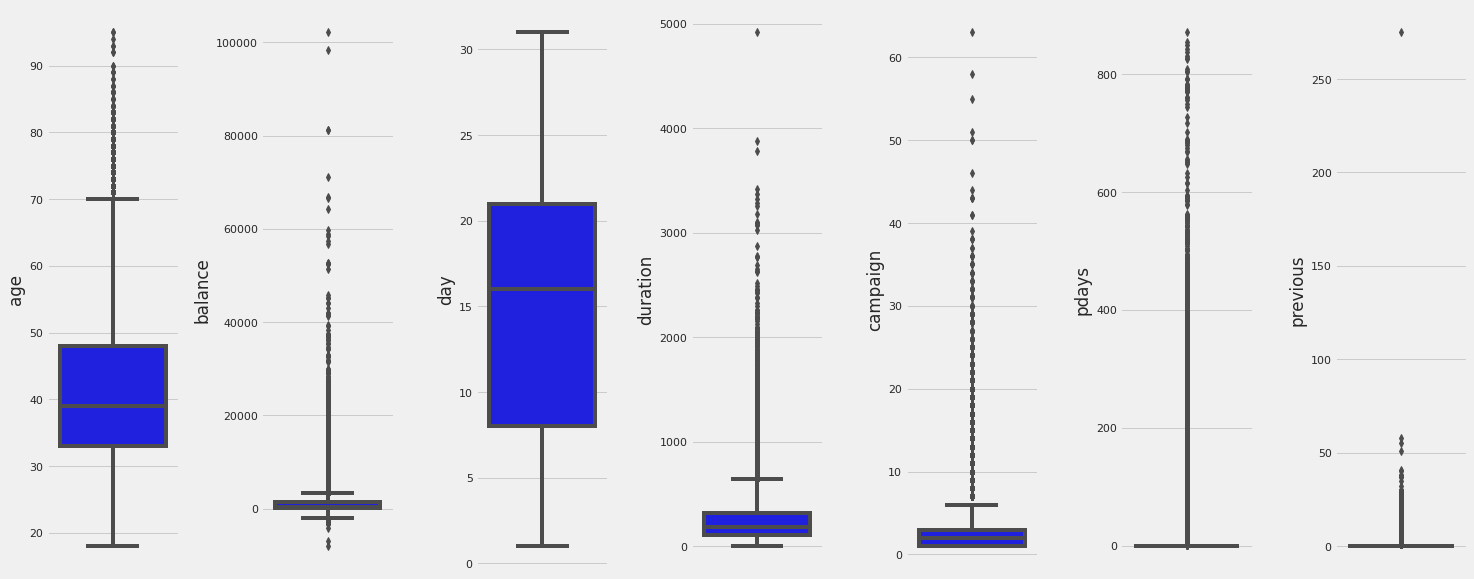

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Dari boxplotnya terlihat distribusi agak normal adalah day, sisanya skewed
* outlier terlihat di semua kolom kecuali day

Dist Plot

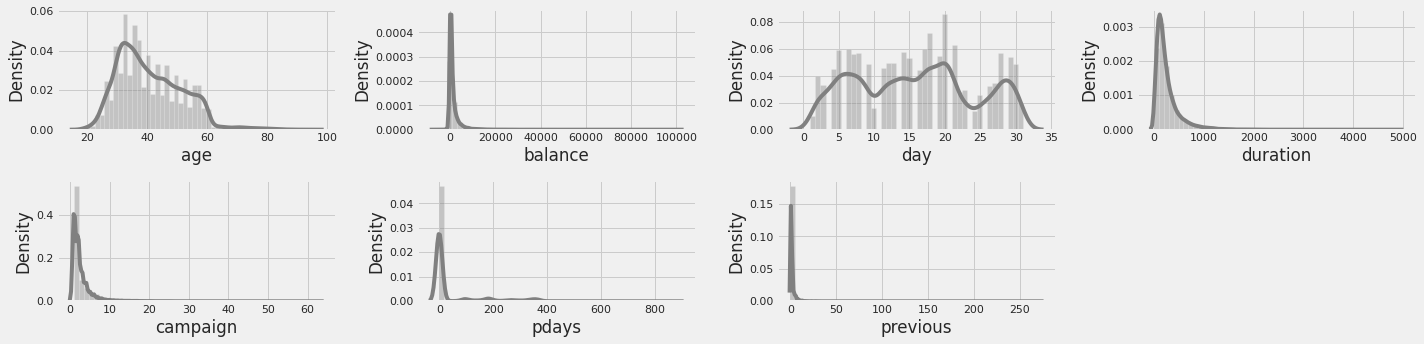

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(2, (len(nums)+1)/2, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

### Multivariate Analysis

Correlation

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['y_numeric'] = df_copy['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_numeric
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
df_copy['default_numeric'] = df_copy['default'].apply(lambda x: 1 if x == 'yes' else 0)
df_copy['housing_numeric'] = df_copy['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df_copy['loan_numeric'] = df_copy['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df_copy['marital_numeric'] = df_copy['marital'].apply(lambda x: 1 if x == 'single' else 2 if x == 'married' else 0)

In [ ]:
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_numeric,default_numeric,housing_numeric,loan_numeric,marital_numeric
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,1,0,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,0,1,1,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,1,0,2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1,0,0,0,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1,0,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,0,0,0,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,0,0,2


In [ ]:
df_copy.corr()

,age,balance,day,duration,campaign,pdays,previous,y_numeric,default_numeric,housing_numeric,loan_numeric,marital_numeric
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.017879,-0.185513,-0.015655,0.126351
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,-0.066745,-0.068768,-0.084350,0.028172
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,0.009424,-0.027982,0.011370,0.005217
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,-0.010021,0.005075,-0.012412,-0.018834
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,0.016822,-0.023599,0.009980,0.029294
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621,-0.029979,0.124178,-0.022754,-0.020832
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236,-0.018329,0.037076,-0.011043,-0.006876
y_numeric,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000,-0.022419,-0.139173,-0.068185,-0.043846
default_numeric,-0.017879,-0.066745,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419,1.000000,-0.006025,0.077234,-0.018404
housing_numeric,-0.185513,-0.068768,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173,-0.006025,1.000000,0.041323,0.011671


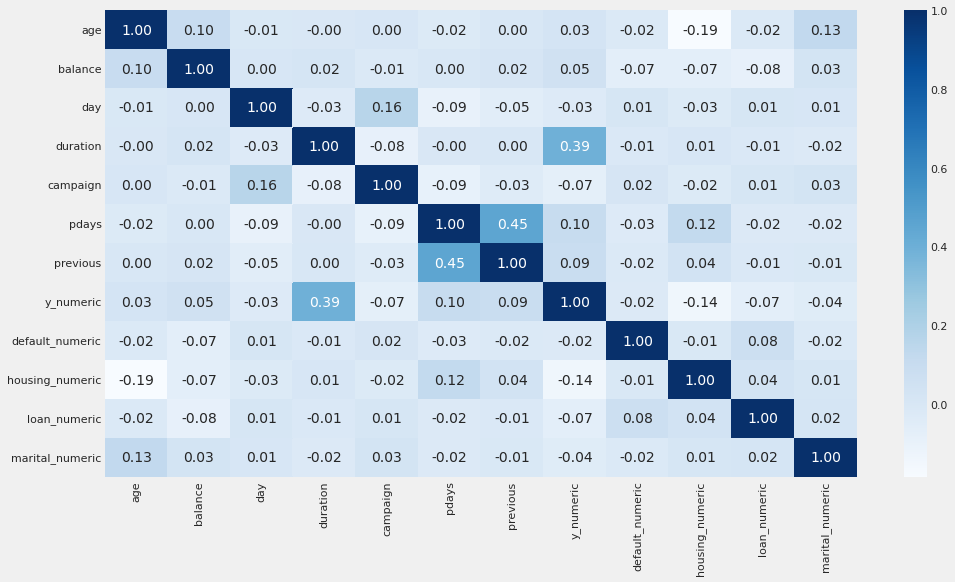

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_copy.corr(), cmap='Blues', annot=True, fmt='.2f')

korelasi paling besar terhadap y secara berurutan: duration 0.39, pdays 0.10, previous 0.09, balance 0.05, age 0.03 


Category Plot

cats = ['job', 'marital','education', 'default','housing', 'loan','contact', 'month','poutcome', 'y']

nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
nums.append('y_numeric')

#### category plot

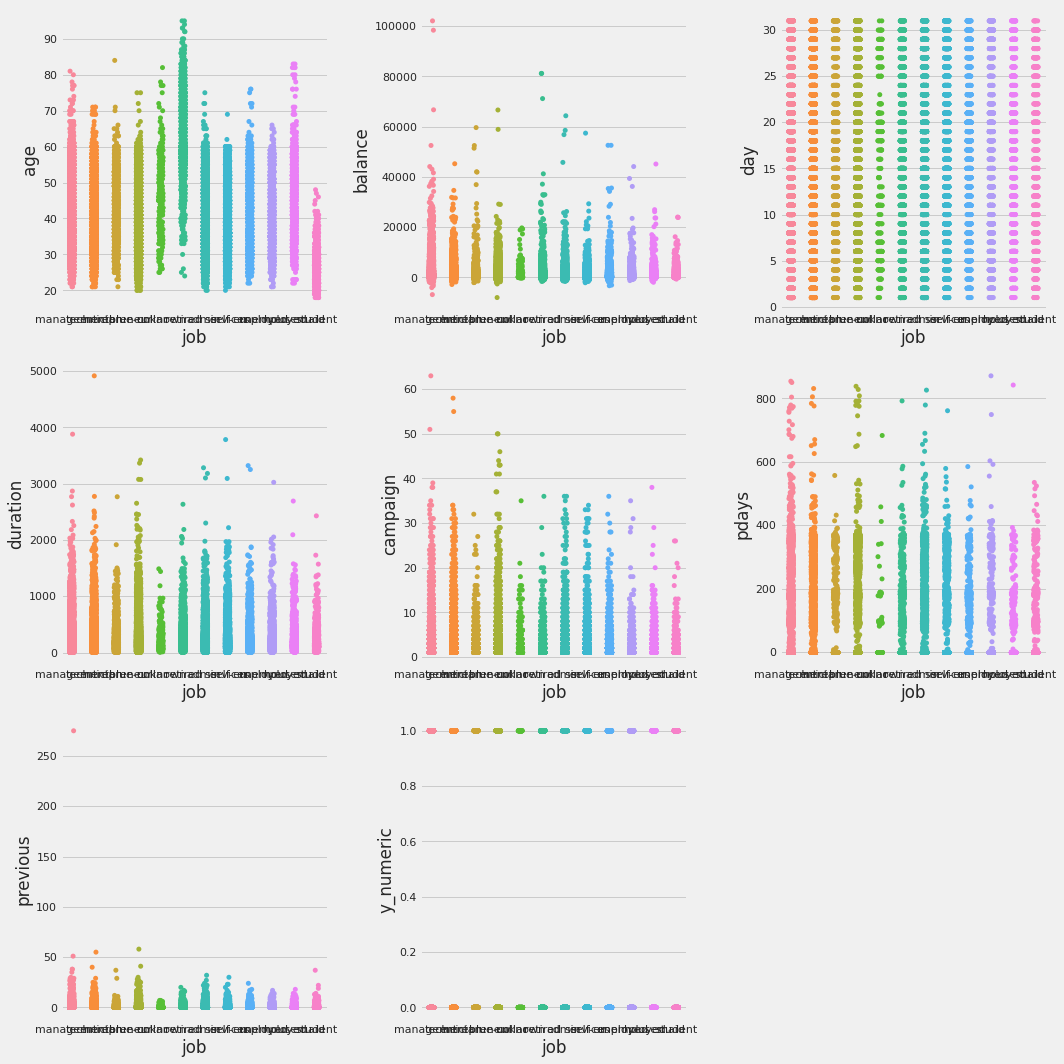

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_copy, x='job', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

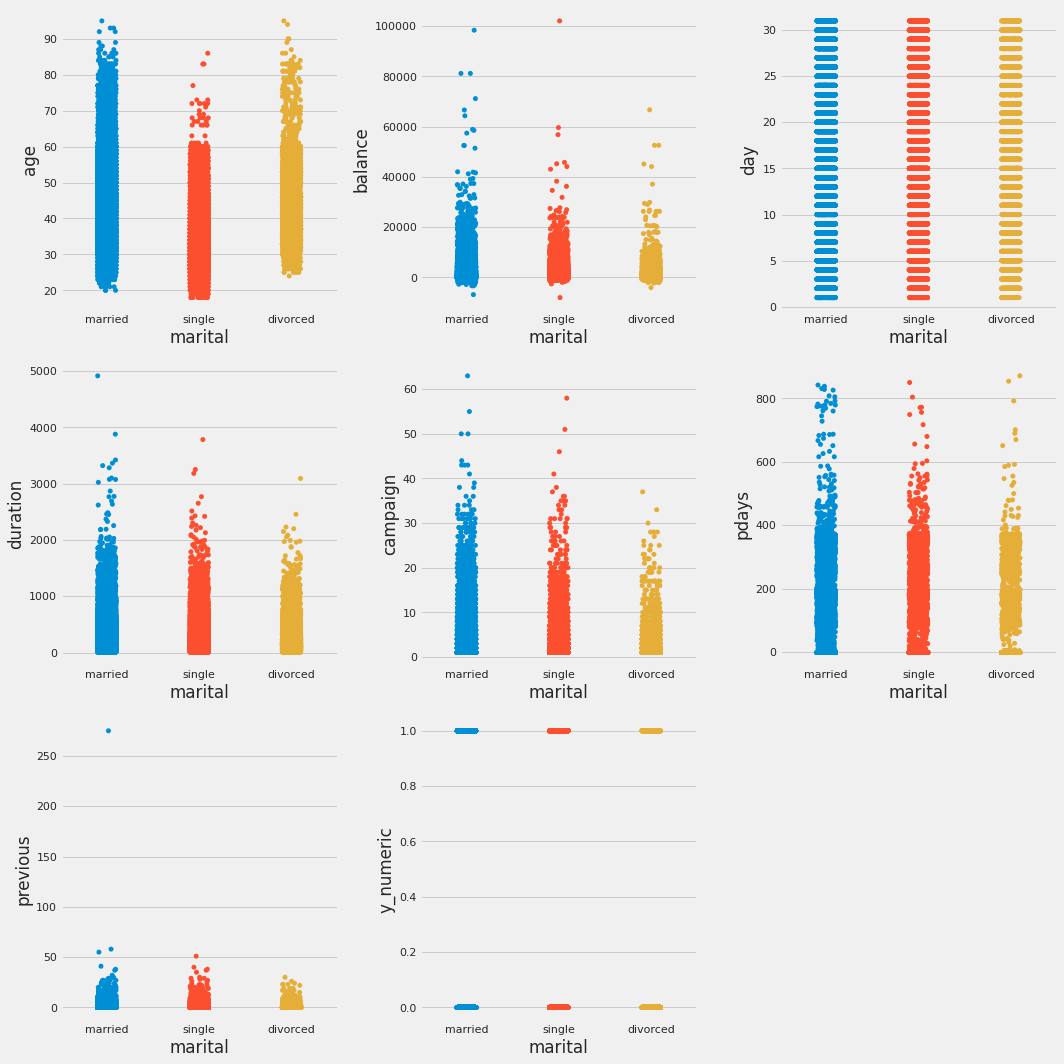

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_copy, x='marital', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_copy, x='job', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

## Insight 

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

* Tidak ada yang memiliki value null (missing value)
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai seperti duration, pdays